# import necessary files for training 

In [4]:
from keras.datasets import imdb
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

# read and pretrain data

In [5]:
(traindata,trainlable),(testdata,testlable) = imdb.load_data(num_words=10000)

In [6]:
train_y = np.asarray(trainlable).astype('float32')

In [8]:
tast_y = np.asarray(testlable).astype('float32')

# Change the nature of data for processing

In [9]:
def vec_sec(sec,dim = 10000):
    resalts = np.zeros((len(sec),dim))
    for i , sec in enumerate(sec):
        resalts[i,sec] = 1.
    return resalts

In [10]:
train_x = vec_sec(traindata)

In [11]:
test_x = vec_sec(testdata)

# Separate train and validation

In [12]:
pre_train_x = train_x[10000:]
pre_train_y = train_y[10000:]
val_x =train_x[:10000]
val_y = train_y[:10000]

# create model for train 

In [16]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# compile model with Specific optimizer and lost function

In [17]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])

# fit model for train 

In [18]:
history = model.fit(pre_train_x,pre_train_y,epochs=20,batch_size=512 , validation_data=(val_x,val_y))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1748 - acc: 0.7731 - val_loss: 0.1197 - val_acc: 0.8611
Epoch 2/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0900 - acc: 0.8997 - val_loss: 0.1001 - val_acc: 0.8719
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0627 - acc: 0.9282 - val_loss: 0.0835 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0478 - acc: 0.9443 - val_loss: 0.0818 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0389 - acc: 0.9555 - val_loss: 0.0833 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.0287 - acc: 0.9687 - val_loss: 0.0862 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0246 - acc: 0.9731 - val_loss: 0.0887 - 

# predict new data from trained model

In [19]:
predict = model.predict(test_x)

# predict prcent

In [20]:
count = 0
for i in range(len(predict)):
    if round(predict[i][0]) == tast_y[i]:
        count += 1
print('predict = '+str((count*100)/len(predict))+'%')

predict = 85.404%


# show loss and accuracy data in chart

In [21]:
history_dict = history.history

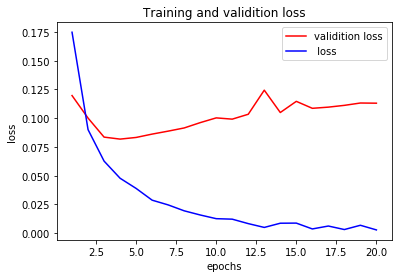

In [22]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_loss'],'r-',label='validition loss')
plt.plot(epochs ,history_dict['loss'],'b',label=' loss')
plt.title('Training and validition loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

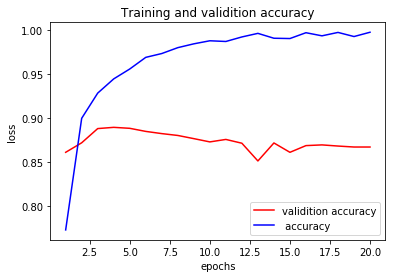

In [23]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_acc'],'r-',label='validition accuracy')
plt.plot(epochs ,history_dict['acc'],'b',label=' accuracy')
plt.title('Training and validition accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#github.com/aidinze